In [ ]:
จุดประสงค์
1.แสดงจานวนเหตุการณ์ของผู้มีผลข้างเคียงรุนแรงจากการเข้ารับวัคซีน COVIDCOVID19 รายวัน ตั้งแต่ 01/01/2021 ถึง 03/19/2021
2. แสดงสถิติจานวนประชากรที่มีผลข้างเคียงรุนแรงจากการเข้ารับวัคซีนแยกตามรัฐ
3. แสดงจานวนประชากรที่มีผลข้างเคียงรุนแรงจากการรับวัคซีน แยกตามผู้ผลิตวัคซีน

In [ ]:
ขั้นตอนการดาเนินการ
1.นาเข้าไลบรารี
2.นาเข้าข้อมูล CSV
3.แสดงรายละเอียดข้อมูล
-ข้อมูล person
-ข้อมูล vax
1.เลือกคอลัมน์ที่ต้องการ
-ข้อมูล person
-ข้อมูล vax
1.เลือกเฉพาะผู้ฉีดวัคซีน COVIDCOVID19
2.การจัดการข้อมูลว่าง
3.การผสานข้อมูล
4.บันทึกข้อมูลที่ทาความสะอาด
5.สร้างกราฟ
-กราฟเส้นแสดงจานวนเหตุการณ์ที่มีผลข้างเคียงรุนแรงจากการเข้ารับวัคซีน COVIDCOVID19 รายวัน ตั้งแต่ 01/01/2021 ถึง 03/19/2021
-กราฟแท่งแสดงสถิติจานวนเหตุการณ์ที่มีผลข้างเคียงรุนแรงจากการเข้ารับวัคซีนแยกตามรัฐ
-กราฟวงกลมแสดงสถิติจานวนเหตุการณ์ที่มีผลข้างเคียงรุนแรงจากการเข้ารับวัคซีน แยกตามผู้ผลิตวัคซีน

In [217]:
%matplotlib inline
# นาเข้า Library NumPy
import numpy as np
# นาเข้า Library Pandas
import pandas as pd
# นาเข้า Library Matplotlib
import matplotlib.pyplot as plt

In [19]:
#นาเข้าข้อมูล CSV
# ข้อมูลประชากรที่ได้รับการฉีดวัคซีนเพื่อป้องกันโรคต่างๆ
iso ='ISO 8859-1'
person = pd.read_csv('2021VAERSDATA.csv', encoding = iso)
# ข้อมูลวัคซีนต่างๆ
vax = pd.read_csv('2021VAERSVAX.csv', encoding = iso)

C:\Users\User\AppData\Local\Temp\ipykernel_9292\153669230.py:4: DtypeWarning: Columns (7,12,23) have mixed types. Specify dtype option on import or set low_memory=False.
  person = pd.read_csv('2021VAERSDATA.csv', encoding = iso)


In [6]:
# แสดงตารางตัวอย่างข้อมูล persons
display(person.head(3))
# แสดงขนาดของข้อมูล persons
print(person.shape)

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,None,None,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom
1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""
2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,None,None,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish


(34121, 35)


In [7]:
#แสดงรายละเอียดข้อมูล person
# แสดงค่าทางสถิติ
person.describe()

,VAERS_ID,AGE_YRS,CAGE_YR,CAGE_MO,HOSPDAYS,NUMDAYS,FORM_VERS
count,3.412100e+04,30933.000000,26791.000000,83.000000,2857.000000,31194.000000,34121.000000
mean,9.813066e+05,51.471923,51.135381,0.084337,3.752888,21.077066,1.998124
std,6.204535e+04,18.521742,18.633316,0.178395,3.878654,644.834400,0.043269
min,9.166000e+05,0.080000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,9.264640e+05,37.000000,36.000000,0.000000,1.000000,0.000000,2.000000
50%,9.468370e+05,50.000000,49.000000,0.000000,3.000000,1.000000,2.000000
75%,1.047069e+06,65.000000,65.000000,0.000000,5.000000,3.000000,2.000000
max,1.115348e+06,115.000000,106.000000,0.700000,39.000000,36896.000000,2.000000


In [8]:
# แสดงรายละเอียดของ person
person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34121 entries, 0 to 34120
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VAERS_ID      34121 non-null  int64  
 1   RECVDATE      34121 non-null  object 
 2   STATE         28550 non-null  object 
 3   AGE_YRS       30933 non-null  float64
 4   CAGE_YR       26791 non-null  float64
 5   CAGE_MO       83 non-null     float64
 6   SEX           34121 non-null  object 
 7   RPT_DATE      63 non-null     object 
 8   SYMPTOM_TEXT  34119 non-null  object 
 9   DIED          1957 non-null   object 
 10  DATEDIED      1798 non-null   object 
 11  L_THREAT      1259 non-null   object 
 12  ER_VISIT      11 non-null     object 
 13  HOSPITAL      4387 non-null   object 
 14  HOSPDAYS      2857 non-null   float64
 15  X_STAY        52 non-null     object 
 16  DISABLE       870 non-null    object 
 17  RECOVD        31264 non-null  object 
 18  VAX_DATE      32622 non-nu

In [31]:
# แสดงรายละเอียดของ vax
vax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34630 entries, 0 to 34629
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   VAERS_ID         34630 non-null  int64 
 1   VAX_TYPE         34630 non-null  object
 2   VAX_MANU         34630 non-null  object
 3   VAX_LOT          23513 non-null  object
 4   VAX_DOSE_SERIES  34568 non-null  object
 5   VAX_ROUTE        26229 non-null  object
 6   VAX_SITE         26687 non-null  object
 7   VAX_NAME         34630 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


In [21]:
# แสดงค่า unique ของ VAX_TYPE
vax['VAX_TYPE'].unique()

array(['COVID19', 'UNK', 'FLU4', 'DTAPHEPBIP', 'HIBV', 'RV1', 'FLUX',
       'HEP', 'MMR', 'VARZOS', 'DTAP', 'PPV', 'HPV9', 'CHOL', 'DT',
       'TTOX', 'FLU3', 'FLUC3', 'FLUC4', 'PNC13', 'FLUR4', 'MNQ', 'HPV4',
       'TDAP', 'FLUA3', 'HEPA', 'VARCEL', 'FLUA4', 'ANTH', 'IPV', 'TYP',
       'HPVX', 'DTP', 'DTAPIPVHIB', 'RV5', 'MENB', 'RAB', 'FLUN4', 'PNC',
       'OPV', 'YF'], dtype=object)

In [20]:
vax.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916600,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
1,916601,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
2,916602,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916603,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))
4,916604,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA))


In [28]:
# แสดงข้อมูลเฉพาะวัคซีน COVIDCOVID19
vax[vax['VAX_TYPE']=='COVID19']

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916600,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
1,916601,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
2,916602,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916603,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))
4,916604,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA))
...,...,...,...,...,...,...,...,...
34625,1113917,COVID19,MODERNA,01120A,1,OT,NaN,COVID19 (COVID19 (MODERNA))
34626,1113920,COVID19,PFIZER\BIONTECH,Unknown,1,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
34627,1113963,COVID19,PFIZER\BIONTECH,EL9264,2,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
34628,1115045,COVID19,MODERNA,NaN,2,OT,NaN,COVID19 (COVID19 (MODERNA))


In [35]:
person.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES'],
      dtype='object')

In [200]:
# ข้อมูล person ต้องการข้อมูลเฉพาะคอลัมน์ VAERS_ID, RECVDATE, STATE, AGE_YRS, SEX, DIED
person_df = person[['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'SEX', 'DIED']]
display(person_df.head(3))

,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED
0,916600,01/01/2021,TX,33.0,F,NaN
1,916601,01/01/2021,CA,73.0,F,NaN
2,916602,01/01/2021,WA,23.0,F,NaN


In [201]:
#เลือกคอลัมน์ที่ต้องการ ข้อมูล person
# เปลี่ยนชื่อคอลัมน์
# VAERS_ID--> vaers_id
# RECVDATE--> rec_date
# STATE--> state
# AGE_YRS--> age
# SEX--> gender
# DIED--> died
person_df.rename(columns = {'VAERS_ID':'vaers_id',
                            'RECVDATE': 'rec_date',
                            'STATE': 'state',
                            'AGE_YRS': 'age',
                            'SEX': 'gender',
                            'DIED': 'died'},inplace =True)
person_df.info()
# คอลัมน์ state, age แะล died มีค่า NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34121 entries, 0 to 34120
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   vaers_id  34121 non-null  int64  
 1   rec_date  34121 non-null  object 
 2   state     28550 non-null  object 
 3   age       30933 non-null  float64
 4   gender    34121 non-null  object 
 5   died      1957 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.6+ MB


C:\Users\User\AppData\Local\Temp\ipykernel_9292\1654414171.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  person_df.rename(columns = {'VAERS_ID':'vaers_id',


In [239]:
#เลือกคอลัมน์ที่ต้องการ ข้อมูล vax
# ข้อมูล vax ต้องการข้อมูลเฉพาะคอลัมน์ VAERS_ID, VAX_TYPE, VAX_MANU
vax_df = vax[['VAERS_ID',  'VAX_TYPE', 'VAX_MANU']]
display(vax_df.head(3))

,VAERS_ID,VAX_TYPE,VAX_MANU
0,916600,COVID19,MODERNA
1,916601,COVID19,MODERNA
2,916602,COVID19,PFIZER\BIONTECH


In [240]:
#เลือกคอลัมน์ที่ต้องการ ข้อมูล vax
# เปลี่ยนชื่อคอลัมน์
# VAERS_ID--> vaers_id
# VAX_TYPE--> type
# VAX_MANU--> brand_vax
vax_df.rename(columns = {'VAERS_ID': 'vaers_id',
                         'VAX_TYPE':'type',
                         'VAX_MANU': 'brand_vax'},inplace =True)
vax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34630 entries, 0 to 34629
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vaers_id   34630 non-null  int64 
 1   type       34630 non-null  object
 2   brand_vax  34630 non-null  object
dtypes: int64(1), object(2)
memory usage: 811.8+ KB


C:\Users\User\AppData\Local\Temp\ipykernel_9292\3920599107.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vax_df.rename(columns = {'VAERS_ID': 'vaers_id',


In [241]:
vax_df

,vaers_id,type,brand_vax
0,916600,COVID19,MODERNA
1,916601,COVID19,MODERNA
2,916602,COVID19,PFIZER\BIONTECH
3,916603,COVID19,MODERNA
4,916604,COVID19,MODERNA
...,...,...,...
34625,1113917,COVID19,MODERNA
34626,1113920,COVID19,PFIZER\BIONTECH
34627,1113963,COVID19,PFIZER\BIONTECH
34628,1115045,COVID19,MODERNA


In [242]:
# droup duplicates vaers_id
#ที่ซ้ากันออก
vax_df.drop_duplicates(subset = 'vaers_id', inplace = True)
vax_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34121 entries, 0 to 34629
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vaers_id   34121 non-null  int64 
 1   type       34121 non-null  object
 2   brand_vax  34121 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


C:\Users\User\AppData\Local\Temp\ipykernel_9292\2704203975.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vax_df.drop_duplicates(subset = 'vaers_id', inplace = True)


In [243]:
# เลือกเฉพาะผู้ฉีดวัคซีน COVIDCOVID19เท่านั้น ลงใน DataFrame เดิม
vax_df = vax_df[vax_df['type'] == 'COVID19']
display(vax_df)

,vaers_id,type,brand_vax
0,916600,COVID19,MODERNA
1,916601,COVID19,MODERNA
2,916602,COVID19,PFIZER\BIONTECH
3,916603,COVID19,MODERNA
4,916604,COVID19,MODERNA
...,...,...,...
34625,1113917,COVID19,MODERNA
34626,1113920,COVID19,PFIZER\BIONTECH
34627,1113963,COVID19,PFIZER\BIONTECH
34628,1115045,COVID19,MODERNA


In [244]:
person_df.columns

Index(['vaers_id', 'rec_date', 'state', 'age', 'gender', 'died'], dtype='object')

In [245]:
#การจัดการข้อมูลว่างของ person
# ลบแถวที่ข้อมูลที่ state มีค่าเป็น NaN
person_df.dropna(subset = ['state'], inplace = True )
# ลบแถวที่ข้อมูลที่ age มีค่าเป็น NaN
person_df.dropna(subset = ['age'], inplace = True )
# คอลัมน์ died แทนค่า NaN ด้วย '
person_df.loc[(person_df['died'].isna()),'died'] = 'N'
# แสดงตัวอย่างข้อมูลหลังจากจัดการค่าว่าง
display(person_df.head(5))

C:\Users\User\AppData\Local\Temp\ipykernel_9292\3563875261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  person_df.dropna(subset = ['state'], inplace = True )
C:\Users\User\AppData\Local\Temp\ipykernel_9292\3563875261.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  person_df.dropna(subset = ['age'], inplace = True )


,vaers_id,rec_date,state,age,gender,died
0,916600,01/01/2021,TX,33.0,F,N
1,916601,01/01/2021,CA,73.0,F,N
2,916602,01/01/2021,WA,23.0,F,N
3,916603,01/01/2021,WA,58.0,F,N
4,916604,01/01/2021,TX,47.0,F,N


In [246]:
person_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26765 entries, 0 to 34119
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   vaers_id  26765 non-null  int64  
 1   rec_date  26765 non-null  object 
 2   state     26765 non-null  object 
 3   age       26765 non-null  float64
 4   gender    26765 non-null  object 
 5   died      26765 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ MB


การผสานข้อมูล 

In [247]:
# แสดงตัวอย่างข้อมูล person_df
display(person_df.head(3))

,vaers_id,rec_date,state,age,gender,died
0,916600,01/01/2021,TX,33.0,F,N
1,916601,01/01/2021,CA,73.0,F,N
2,916602,01/01/2021,WA,23.0,F,N


In [248]:
# แสดงตัวอย่างข้อมูล vax_df
display(vax_df.head(3))

,vaers_id,type,brand_vax
0,916600,COVID19,MODERNA
1,916601,COVID19,MODERNA
2,916602,COVID19,PFIZER\BIONTECH


In [249]:
# ทาการ merge dataset ลงใน df โดยการทา inner join on vaers_id
df = pd.merge(person_df, vax_df, on ='vaers_id')
# แสดงตัวอย่างข้อมูลหลังจากการ merge
display(df.head(3))

,vaers_id,rec_date,state,age,gender,died,type,brand_vax
0,916600,01/01/2021,TX,33.0,F,N,COVID19,MODERNA
1,916601,01/01/2021,CA,73.0,F,N,COVID19,MODERNA
2,916602,01/01/2021,WA,23.0,F,N,COVID19,PFIZER\BIONTECH


In [250]:
# บันทึกข้อมูลที่ทาการ cleansing และ merge data แล้วโดยตั้งชื่อไฟล์ว่า vaccinated covidcovid19.csv
df.to_csv('vaccinated-covidcovid19.csv', index=False)

In [251]:
df

,vaers_id,rec_date,state,age,gender,died,type,brand_vax
0,916600,01/01/2021,TX,33.0,F,N,COVID19,MODERNA
1,916601,01/01/2021,CA,73.0,F,N,COVID19,MODERNA
2,916602,01/01/2021,WA,23.0,F,N,COVID19,PFIZER\BIONTECH
3,916603,01/01/2021,WA,58.0,F,N,COVID19,MODERNA
4,916604,01/01/2021,TX,47.0,F,N,COVID19,MODERNA
...,...,...,...,...,...,...,...,...
26613,1113916,03/19/2021,NY,85.0,M,N,COVID19,MODERNA
26614,1113917,03/19/2021,FL,88.0,F,N,COVID19,MODERNA
26615,1113920,03/19/2021,PA,83.0,F,N,COVID19,PFIZER\BIONTECH
26616,1113963,03/19/2021,MS,59.0,F,Y,COVID19,PFIZER\BIONTECH


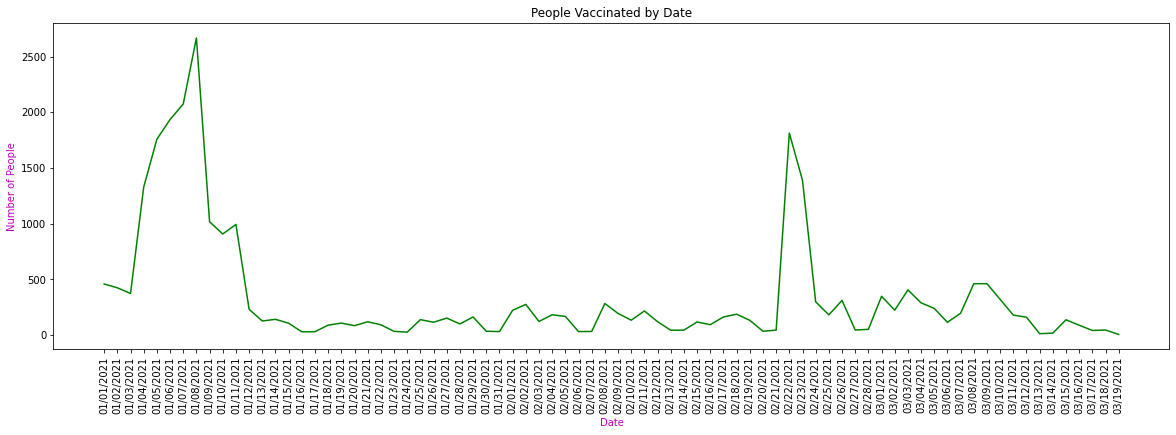

In [252]:
# แสดงจานวนเหตุการณ์ที่มีผลข้างเคียงรุนแรงจากการรับวัคซีน COVIDCOVID19 รายวัน ตั้งแต่ 01/01/2021 ถึง 03/19/2021

fig = plt.figure(figsize=(20, 6))
group_date = df.groupby(['rec_date'])['vaers_id'].count()
plt.plot(group_date.index, group_date, color='green')
plt.title('People Vaccinated by Date')
plt.xlabel('Date', color = 'm')
plt.ylabel('Number of People', color = 'm')
plt.xticks(rotation ='vertical')
plt.show()

<AxesSubplot:ylabel='Vaccine Menufacture'>

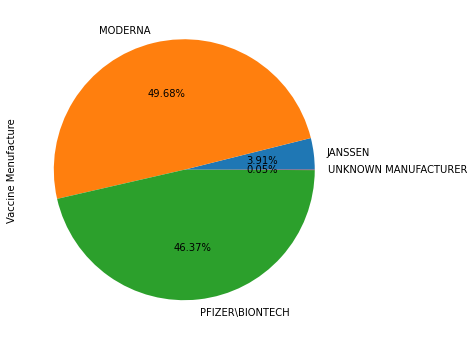

In [257]:
fig = plt.figure(figsize=(6,6))
group_brand = df.groupby(['brand_vax'])['vaers_id'].count()
group_brand.plot(kind='pie',label=('Vaccine Menufacture'),autopct='%.2f%%')